## 1. Introduction & Problem Statement
**Project Overview**:  
This project leverages customer transaction data and demographic attributes to uncover behavioral patterns, identify high-value customers, and provide actionable insights that drive business decisions for the bank. Through comprehensive analysis, the goal is to combine data-driven understanding with strategic business perspectives to support customer engagement, retention, and growth.  

**Business Context:**  
In a competitive banking environment, understanding customer behavior is critical for optimizing marketing efforts, enhancing product offerings, and improving customer loyalty. By analyzing transaction trends, spending patterns, and demographic characteristics, the bank can better anticipate customer needs, allocate resources effectively, and target interventions to maximize revenue and engagement.  

**Objectives:**  
- **Analyze Transaction Behavior:** Identify temporal trends, peak activity periods, and spending patterns to optimize promotions, system capacity, and operational planning.  
- **Customer Segmentation (RFM Analysis):** Segment customers based on Recency, Frequency, and Monetary metrics to distinguish high-value, loyal, and at-risk customers, enabling personalized engagement strategies.  
- **Location-Based Insights:** Explore regional differences in transaction volumes and spending behavior to inform targeted, geography-specific campaigns and resource allocation.  
- **Actionable Recommendations:** Translate analytical findings into concrete strategies that enhance retention, drive growth, and maximize customer lifetime value.  

## 2. Dataset Overview & Initial Exploration

### 2.1 Import Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Load the dataset
df = pd.read_csv('bank_transactions.csv')

# Remove white spaces of columns
df.columns = df.columns.str.strip().str.replace(' ', '', regex=False)

# Preview first 5 rows
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount(INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,"17,819.05",2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,"2,270.69",2/8/16,141858,"27,999.00"
2,T3,C4417068,26/11/96,F,MUMBAI,"17,874.44",2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,"866,503.21",2/8/16,142714,"2,060.00"
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,"6,714.43",2/8/16,181156,"1,762.50"


### 2.3 Dataset Structure

In [133]:
# Number of rows and columns of the dataset
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Rows:  1048567
Columns:  9


In [134]:
# Check column info (names, data types, nulls, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   TransactionID           1048567 non-null  object 
 1   CustomerID              1048567 non-null  object 
 2   CustomerDOB             1045170 non-null  object 
 3   CustGender              1047467 non-null  object 
 4   CustLocation            1048416 non-null  object 
 5   CustAccountBalance      1046198 non-null  float64
 6   TransactionDate         1048567 non-null  object 
 7   TransactionTime         1048567 non-null  int64  
 8   TransactionAmount(INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [135]:
# Preview basic statistics of numerical columns
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount(INR)
count,"1,046,198.00","1,048,567.00","1,048,567.00"
mean,"115,403.54","157,087.53","1,574.34"
std,"846,485.38","51,261.85","6,574.74"
min,0.00,0.00,0.00
25%,"4,721.76","124,030.00",161.00
50%,"16,792.18","164,226.00",459.03
75%,"57,657.36","200,010.00","1,200.00"
max,"115,035,495.10","235,959.00","1,560,034.99"


In [136]:
# Check for missing values
df.isnull().sum()

TransactionID                0
CustomerID                   0
CustomerDOB               3397
CustGender                1100
CustLocation               151
CustAccountBalance        2369
TransactionDate              0
TransactionTime              0
TransactionAmount(INR)       0
dtype: int64

In [137]:
# Check for duplicate values
num_duplicates = df.duplicated().sum()

if num_duplicates == 0:
    print('No duplicate rows is found.')
else:
    print(f'There are {num_duplicates} duplicate rows in the dataset.')

No duplicate rows is found.


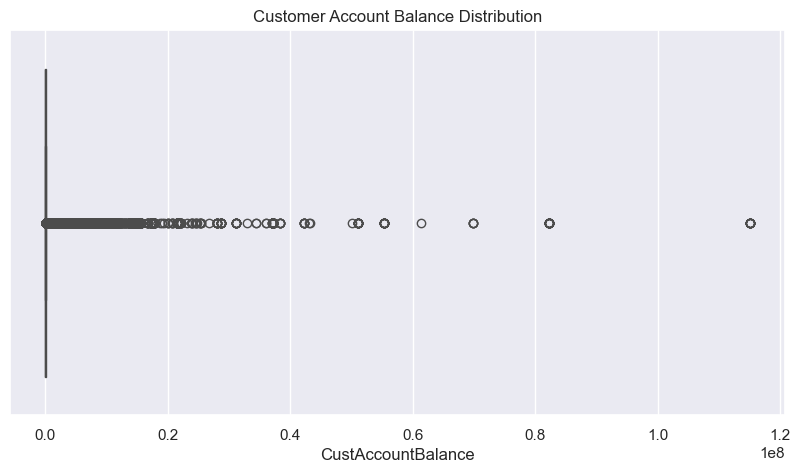

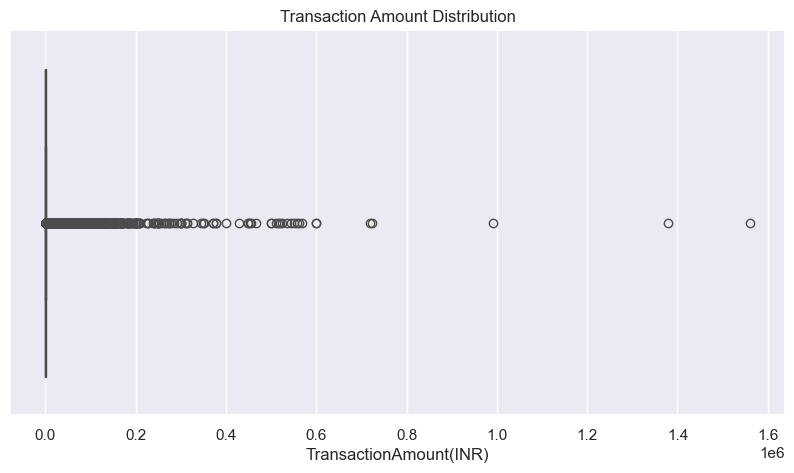

In [138]:
# Check for any outliers for numeric columns

# Boxplot for Customer Account Balance
plt.figure(figsize=(10,5))
sns.boxplot(x=df['CustAccountBalance'])
plt.title('Customer Account Balance Distribution')
plt.show()

# Boxplot for Transaction Amount
plt.figure(figsize=(10,5))
sns.boxplot(x=df['TransactionAmount(INR)'])
plt.title('Transaction Amount Distribution')
plt.show()

### 2.4 Initial Observations

- A small proportion of missing values was identified across several variables: CustAccountBalance (0.2%), CustomerDOB (0.3%), CustGender (0.1%), and CustLocation (0.01%).

- Both Customer Account Balance and Transaction Amount distributions are highly right-skewed, with median values significantly lower than their means. This indicates the presence of a few customers holding exceptionally high balances or transaction volumes.

- From the boxplot of CustAccountBalance, it is evident that most customers maintain relatively low balances, while a small number have extremely large ones. Since these high-value cases are crucial for understanding customer diversity and business potential, they were retained in the dataset rather than treated as outliers to be removed. To handle missing values in CustAccountBalance, the median was chosen as the imputation method instead of the mean, ensuring robustness against the influence of these extreme observations.

# 3. Data Cleaning & Preparation

### 3.1 Handle Missing Values
- CustAccountBalance: fill with median because data is skewed (median is less affected by outliers)
- CustomerDOB, CustGender, CustLocation: drop rows (small % missing, smoother for later calculations)

In [139]:
# Fill CustAccountBalance missing with median
df['CustAccountBalance'] = df['CustAccountBalance'].fillna(df['CustAccountBalance'].median())

# Drop rows with missing DOB, Gender, or Location
df.dropna(subset=['CustomerDOB', 'CustGender', 'CustLocation'], inplace=True)

# Final check of missing values
df.isnull().sum()

TransactionID             0
CustomerID                0
CustomerDOB               0
CustGender                0
CustLocation              0
CustAccountBalance        0
TransactionDate           0
TransactionTime           0
TransactionAmount(INR)    0
dtype: int64

### 3.2 Convert Data Types

In [140]:
# Rename the columns for clarity
df.rename(columns={'TransactionAmount(INR)': 'TransactionAmount_INR'}, inplace=True)

In [141]:
df['CustomerDOB'].value_counts()

CustomerDOB
1/1/1800    56466
1/1/89        809
1/1/90        784
6/8/91        699
1/1/91        666
            ...  
27/9/48         1
4/3/61          1
13/6/47         1
11/7/00         1
1/2/44          1
Name: count, Length: 17253, dtype: int64

In [142]:
# '1/1/1800' appears to be a system default/placeholder for missing DOBs,
# which is unrealistic (would imply >200 years old), so these rows are dropped.
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index, axis=0)

In [143]:
# Convert CustomerDOB to datetime
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y')

# Correct possible DOBs error (eg. Pandas might interpret 1957 as 2057)
df.loc[df['CustomerDOB'] > pd.Timestamp('today'), 'CustomerDOB'] -= pd.DateOffset(years=100)

# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')

# Convert TransactionTime to HHMMSS format
df['TransactionTime'] = pd.to_datetime(
    df['TransactionTime'].astype(str).str.zfill(6),
    format='%H%M%S'
).dt.time

In [144]:
# Create CustomerAge Column for analysis
df['CustomerAge'] = (pd.Timestamp('today') - df['CustomerDOB']).dt.days // 365

# Drop unrealistic ages
df = df[(df['CustomerAge'] > 0) & (df['CustomerAge'] <= 120)]

# Create CustomerAgeGroup for analysis
df['CustomerAgeGroup'] = pd.cut(df['CustomerAge'],
                                bins=[0,24,34,44,54,64,120],
                                labels=['<25','25-34','35-44','45-54','55-64','65+'])

In [145]:
#Normalize location names
df['CustLocation'] = df['CustLocation'].str.title()

In [146]:
#Display cleaned dataset
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR,CustomerAge,CustomerAgeGroup
0,T1,C5841053,1994-01-10,F,Jamshedpur,"17,819.05",2016-08-02,14:32:07,25.00,31,25-34
1,T2,C2142763,1957-04-04,M,Jhajjar,"2,270.69",2016-08-02,14:18:58,"27,999.00",68,65+
2,T3,C4417068,1996-11-26,F,Mumbai,"17,874.44",2016-08-02,14:27:12,459.00,28,25-34
3,T4,C5342380,1973-09-14,F,Mumbai,"866,503.21",2016-08-02,14:27:14,"2,060.00",52,45-54
4,T5,C9031234,1988-03-24,F,Navi Mumbai,"6,714.43",2016-08-02,18:11:56,"1,762.50",37,35-44


## 4. SQL Queries Analysis

In [147]:
import sqlite3

In [148]:
# Create in-memory sqlite3 database
conn = sqlite3.connect('bank_transactions.db')

# Load cleaned dataframe into SQL table
df.to_sql('transactions', conn, if_exists='replace', index=False)

987515

### 4.1 Transaction Trends

### 1. Monthly Transaction Trend

**Objective:**  
Identify when customers transact most frequently or have the highest transaction volume to uncover seasonal or monthly activity patterns.  

**Questions in mind:**  
- Are there months with higher transaction volumes?  
- Can this pattern guide promotional planning or system capacity management?  

**Business insight:**  
Understanding monthly transaction behavior helps optimize marketing timing and resource allocation, ensuring the bank engages customers at peak periods.

In [149]:
query = """
SELECT 
    CustomerID, 
    strftime('%m', TransactionDate) as Month,
    AVG(TransactionAmount_INR) as AvgTransactionAmount,
    SUM(TransactionAmount_INR) as TotalTransactionAmount,
    COUNT(TransactionID) AS TransactionCount
FROM transactions
GROUP BY Month
ORDER BY Month;
"""
monthly_trend = pd.read_sql_query(query, conn)
monthly_trend.head()

,CustomerID,Month,AvgTransactionAmount,TotalTransactionAmount,TransactionCount
0,C5841053,08,"1,455.47","895,418,254.29",615207
1,C1710412,09,"1,446.04","533,434,808.90",368893
2,C5413870,10,"1,950.53","6,661,060.99",3415


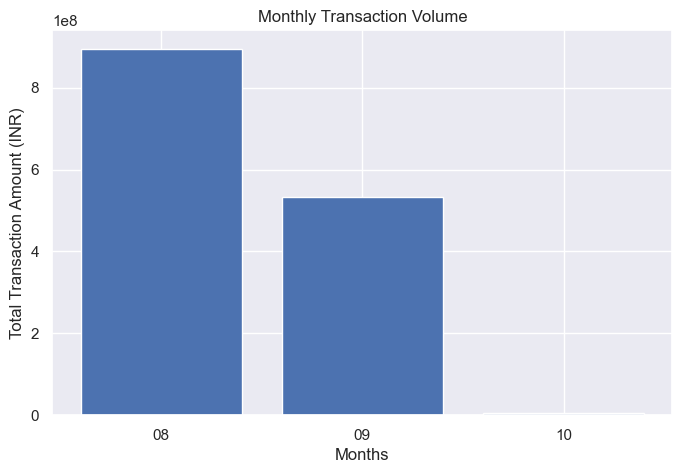

In [150]:
# Bar chart for monthly transactions
plt.figure(figsize=(8,5))
plt.bar(monthly_trend['Month'], monthly_trend['TotalTransactionAmount'])
plt.title('Monthly Transaction Volume')
plt.xlabel('Months')
plt.ylabel('Total Transaction Amount (INR)')
sns.set_theme(style='darkgrid')
plt.show()

It shows that the dataset has limited data for whole year's monthly transaction analysis, so I decided to add a weekly trend analysis to discover more.

#### 2. Weekly Transaction Trend
**Objective**:
Identify which days (weekdays or weekends) have higher transaction volumes to help banks optimize system performance, marketing timing, and staffing allocation.

**Questions in mind**:
- Are customers more active during weekdays or weekends?
- Do spending amounts differ depending on the day?

**Business insight**:
Understanding weekday vs. weekend patterns helps the bank plan maintenance schedules, campaign launches, and staffing more efficiently, especially during peak transaction days.

In [151]:
query = """
SELECT  
    CASE strftime('%w', TransactionDate)
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS Weekday,
    AVG(TransactionAmount_INR) as AvgTransactionAmount,
    SUM(TransactionAmount_INR) as TotalTransactionAmount,
    COUNT(TransactionID) AS TransactionCount
FROM transactions
GROUP BY Weekday
ORDER BY 
    CASE Weekday
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
        WHEN 'Saturday' THEN 6
        WHEN 'Sunday' THEN 7
    END;
"""
weekly_trend = pd.read_sql_query(query, conn)
weekly_trend

,Weekday,AvgTransactionAmount,TotalTransactionAmount,TransactionCount
0,Monday,"1,438.90","210,115,865.66",146025
1,Tuesday,"1,376.47","187,740,410.25",136393
2,Wednesday,"1,383.55","184,299,957.01",133208
3,Thursday,"1,410.81","200,506,963.28",142122
4,Friday,"1,429.78","179,427,156.69",125493
5,Saturday,"1,571.32","221,163,091.43",140750
6,Sunday,"1,542.65","252,260,679.86",163524


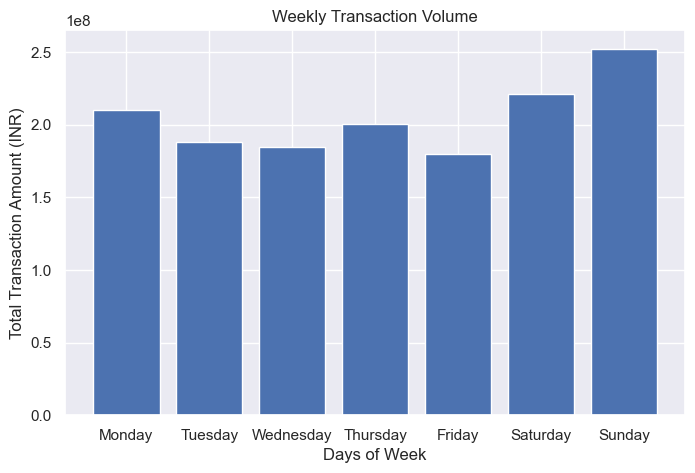

In [152]:
# Bar chart for weekly transactions
plt.figure(figsize=(8,5))
plt.bar(weekday_trend['Weekday'], weekday_trend['TotalTransactionAmount'])
plt.title('Weekly Transaction Volume')
plt.xlabel('Days of Week')
plt.ylabel('Total Transaction Amount (INR)')
sns.set_theme(style='darkgrid')
plt.show()

#### Result interpretation:
Transactions peak on weekends, with Sunday contributing about 18% of total transactions and the highest total value (≈₹252M), followed by Saturday (16%) highlighting stronger spending during leisure days.
Weekdays show steady but lower volumes, with Monday slightly leading and Friday being the quietest(13%).
Average transaction value is 10%-12% higher on weekends than weekdays, suggesting customers spend more per transaction when they have more free time.

Recommendation: 
Focus marketing campaigns and system optimization around weekend peaks, while offering weekday incentives to balance transaction distribution.

### 3. Transaction Amount Distribution  

**Objective:**  
Analyze how much customers typically spend per transaction and identify spending behavior patterns.  

**Questions in mind:**  
- Do customers make frequent small transactions or fewer high-value ones? 
- What is the overall spending structure across the customer base?  

**Business insight:**  
Understanding transaction size patterns helps the bank tailor its marketing and loyalty strategies — for example, promoting micro-purchase rewards for small spenders or exclusive offers for high-value customers. This insight also supports tier-based segmentation and personalized engagement.

In [153]:
query = """
SELECT 
    CASE 
        WHEN [TransactionAmount_INR] < 100 THEN '<100'
        WHEN [TransactionAmount_INR] BETWEEN 100 AND 499 THEN '100-499'
        WHEN [TransactionAmount_INR] BETWEEN 500 AND 999 THEN '500-999'
        WHEN [TransactionAmount_INR] BETWEEN 1000 AND 4999 THEN '1000-4999'
        ELSE '5000+' 
    END as AmountRange,
    COUNT(*) as TransactionCount
FROM transactions
GROUP BY AmountRange
ORDER BY 
    CASE AmountRange
        WHEN '<100' THEN 1
        WHEN '100-499' THEN 2
        WHEN '500-999' THEN 3
        WHEN '1000-4999' THEN 4
        WHEN '5000+' THEN 5
    END;
"""
txn_bins = pd.read_sql_query(query, conn)
txn_bins

,AmountRange,TransactionCount
0,<100,161142
1,100-499,362201
2,500-999,175517
3,1000-4999,238934
4,5000+,49721


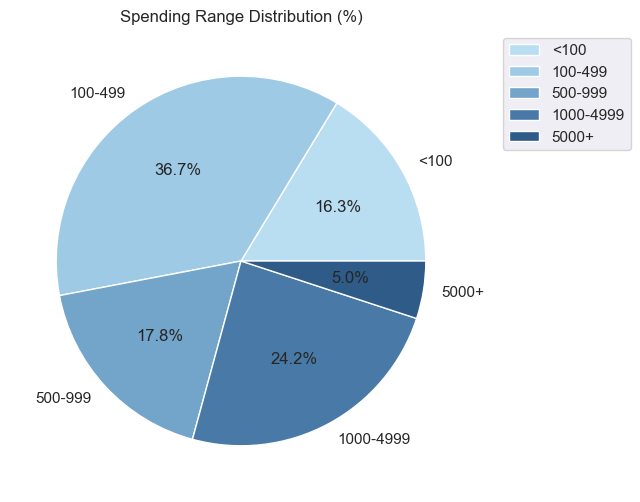

In [154]:
#Pie chart for spending distribution
plt.figure(figsize=(6,6))
colors = ['#B9DDF1', '#9FCAE6', '#73A4CA', '#497AA7', '#2E5B88']
plt.pie(txn_bins['TransactionCount'], labels=txn_bins['AmountRange'], colors=colors, autopct='%1.1f%%')
plt.title('Spending Range Distribution (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Results interpretation
Most transactions fall within the ₹100–₹499 range (39%), followed by ₹1000–₹4999 (26%), indicating that customers mainly make low to mid-value payments.
High-value transactions above ₹5000 account for only about 5%, showing a smaller but premium-spending segment.

Recommendation: Banks can promote cashback or reward programs to engage low-value users, while offering exclusive benefits or premium tiers for high-value customers.

### 4.2 Customer Behavior

#### 1. Customer Transaction Overview
**Objective**:
To identify top customers by total transaction value and understand their average spending behavior.

**Question in mind**:
- What are the average and total transaction amounts of customers?
- Which customers contribute the most to total transaction volume?

**Business insight**:
It helps the company prioritize high-value customers and design personalized retention strategies.

In [155]:
query = """
SELECT 
    CustomerID,
    AVG(TransactionAmount_INR) as AvgTransactionAmount,
    SUM(TransactionAmount_INR) as TotalTransactionAmount,
    COUNT(TransactionID) AS TransactionCount
FROM transactions
GROUP BY CustomerID
ORDER BY TotalTransactionAmount DESC
LIMIT 10;
"""
top_customers = pd.read_sql(query, conn)
top_customers

,CustomerID,AvgTransactionAmount,TotalTransactionAmount,TransactionCount
0,C7319271,"1,560,034.99","1,560,034.99",1
1,C6677159,"1,380,002.88","1,380,002.88",1
2,C4141768,"991,132.22","991,132.22",1
3,C8217728,"362,236.00","724,472.00",2
4,C1830891,"720,001.16","720,001.16",1
5,C6549785,"600,008.32","600,008.32",1
6,C5036642,"600,003.45","600,003.45",1
7,C4328064,"569,500.27","569,500.27",1
8,C1425138,"561,001.00","561,001.00",1
9,C3528755,"137,743.08","550,972.34",4


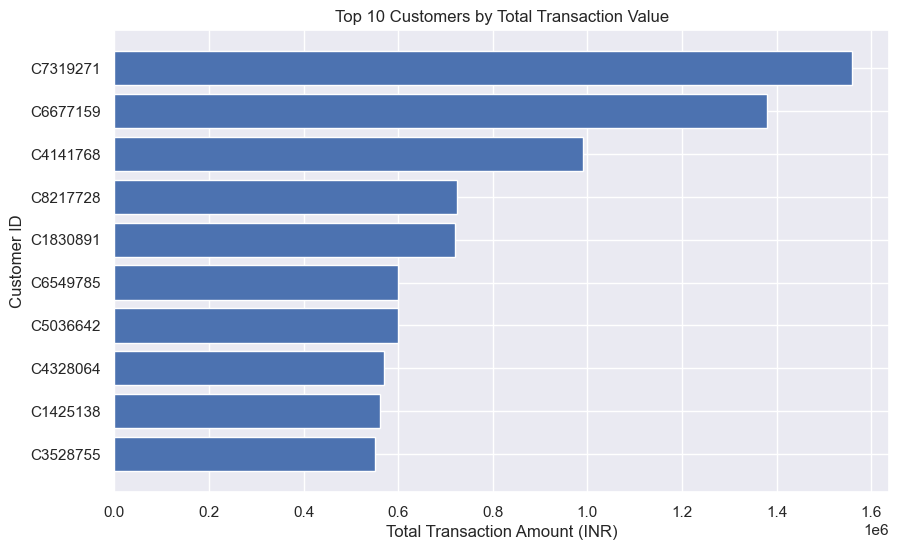

In [156]:
# Horizontal bar chart for showing the top 10 customers' transactions
plt.figure(figsize=(10, 6))
plt.barh(top_customers['CustomerID'].astype(str), top_customers['TotalTransactionAmount'])
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Total Transaction Amount (INR)')
plt.ylabel('Customer ID')
sns.set_theme(style='darkgrid')
plt.gca().invert_yaxis() 
plt.show()

#### Results interpretation
The top 10 customers contribute approximately 5% of the total transaction value, with individual totals ranging from ₹550K to ₹1.56M.

Most top customers made only 1–2 transactions, indicating occasional but high-value spending behavior rather than frequent usage.

Recommendation: A small group of high-value clients drives a disproportionate share of revenue, highlighting the need for personalized retention and premium service strategies to maintain their engagement and loyalty.

#### 2. Customer Age Group Distribution
**Objective**:
Analyze transaction behavior across different age groups to identify key customer segments and spending patterns.

**Questions in mind**:
- Which age group is most active or contributes the highest transaction value?
- Do younger users make smaller, more frequent payments, while older users make larger but fewer ones?

**Business insight**:
Understanding age-based spending patterns enables the bank to design age-targeted campaigns, personalized offers, and age-appropriate financial products.

In [157]:
query = """
SELECT 
    CustomerAgeGroup,
    AVG(TransactionAmount_INR) as AvgTransactionAmount,
    SUM(TransactionAmount_INR) as TotalTransactionAmount,
    COUNT(TransactionID) AS TransactionCount
FROM transactions
GROUP BY CustomerAgeGroup
ORDER BY
 CASE CustomerAgeGroup
        WHEN '<25' THEN 1
        WHEN '25-34' THEN 2
        WHEN '35-44' THEN 3
        WHEN '45-54' THEN 4
        WHEN '55-64' THEN 5
        WHEN '65+' THEN 6
    END;
"""
age_group = pd.read_sql(query, conn)
age_group

,CustomerAgeGroup,AvgTransactionAmount,TotalTransactionAmount,TransactionCount
0,<25,"2,120.91","1,637,345.59",772
1,25-34,864.81,"245,918,371.65",284361
2,35-44,"1,351.94","663,480,419.43",490763
3,45-54,"2,187.75","318,129,332.70",145414
4,55-64,"2,941.23","125,863,985.71",42793
5,65+,"3,437.75","80,484,669.10",23412


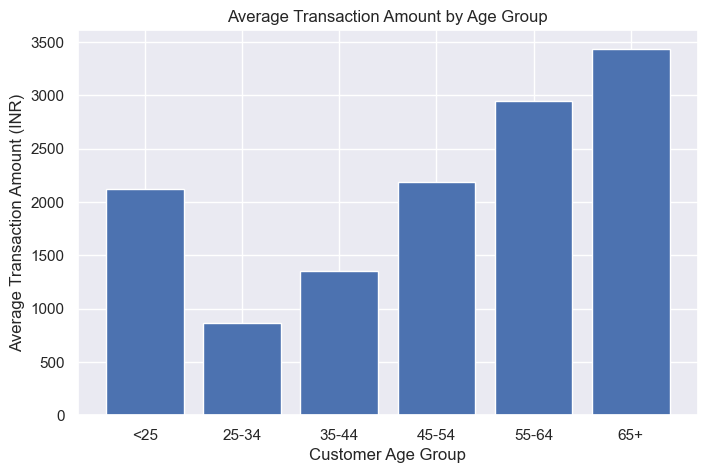

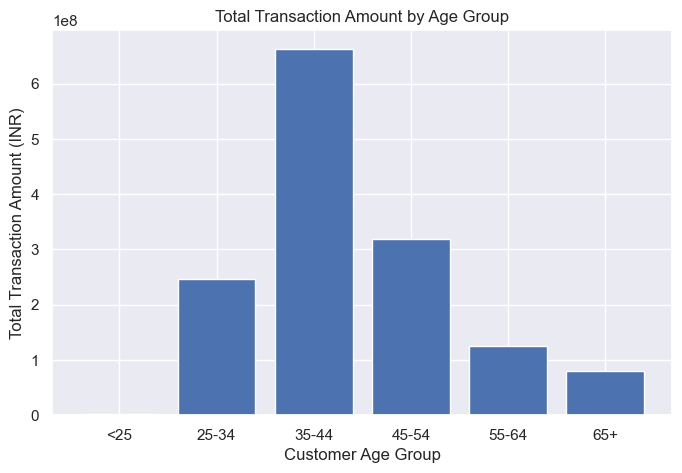

In [158]:
#Bar chart for average transaction amount by age group
plt.figure(figsize=(8,5))
plt.bar(age_group['CustomerAgeGroup'], age_group['AvgTransactionAmount'])
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Transaction Amount (INR)')
sns.set_theme(style='darkgrid')
plt.show()

#Bar chart for total transaction amount by age group
plt.figure(figsize=(8,5))
plt.bar(age_group['CustomerAgeGroup'], age_group['TotalTransactionAmount'])
plt.title('Total Transaction Amount by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Total Transaction Amount (INR)')
sns.set_theme(style='darkgrid')
plt.show()

#### Result interpretation:
The 35–44 age group dominates transaction activity, accounting for the largest number of transaction amounts(44%), indicating high engagement among working-age customers.

However, average transaction value increases with age — customers aged 55 and above account for about 20% of total transaction value, but their average transaction amount is nearly 60% higher than that of younger segments, reflecting greater financial capacity and purchasing power.

Recommendation:
- Maintain engagement with younger customers (25–44) through frequent-use incentives and digital payment campaigns.
- Develop premium or wealth-focused products for older customers (55+) who demonstrate higher spending potential per transaction.

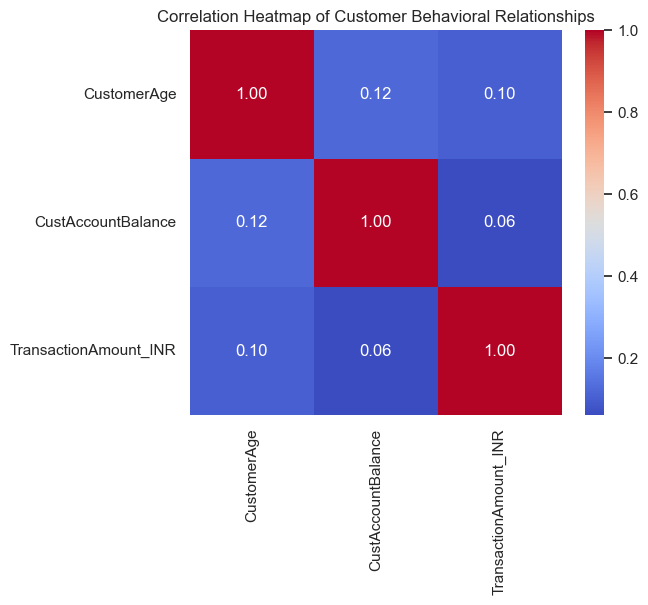

In [174]:
# Plot correlation heatmap for exploratory analysis of behavioral relationships
plt.figure(figsize=(6,5))
sns.heatmap(df[['CustomerAge','CustAccountBalance','TransactionAmount_INR']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Customer Behavioral Relationships')
plt.show()

#### Result interpretations:
Correlation analysis was conducted to explore the relationships between demographic and financial variables, including customer age, account balance, and transaction amount. The results indicate weak but positive associations: Age vs. Account Balance (0.12) suggests that older customers tend to maintain slightly higher balances, potentially reflecting accumulated wealth or more conservative financial behavior. Transaction Amount vs. Age (0.10) indicates that spending modestly increases with age, implying that mature customers often make higher-value transactions. Transaction Amount vs. Account Balance (0.06) shows that customers with larger balances spend marginally more per transaction, though the relationship is weak, highlighting that other factors — such as income, lifestyle, or product preference — also influence spending patterns. Overall, these small yet consistent correlations demonstrate that no single factor dominates customer behavior, reinforcing the need for a multidimensional segmentation model like RFM to capture diverse behavioral patterns across recency, frequency, and monetary dimensions.

### 4.3. Customer Segmentation – RFM Analysis (Recency, Frequency, Monetary) 
**Brief description of RFM model**:
RFM helps evaluate customer behavior by looking at how recently (Recency) and how often (Frequency) they make purchases, along with how much they spend (Monetary). Recent buyers are more likely to engage with campaigns, frequent buyers show strong loyalty, and high-spending customers contribute the most revenue. These metrics together enable identification of valuable customer segments for targeted marketing, personalized offers, and loyalty programs, supporting better retention and revenue growth.

**Objective**:
Segment customers to identify high-value, loyal, and at-risk clients, and prioritize engagement strategies.

**Questions in mind**:
- Which customers are most likely to respond to marketing campaigns based on recent activity?
- Who demonstrates strong loyalty through frequent purchases?
- Which customers contribute the most to overall revenue?
- Which segments are at risk of churn?
- How can the bank tailor engagement strategies for different behavioral groups?

**Business insight**:
RFM segmentation allows the bank to optimize marketing and retention efforts. Targeting recent, frequent, and high-spending customers supports personalized campaigns and loyalty programs, while identifying at-risk or low-engagement customers enables proactive re-engagement, minimizing churn and maximizing long-term revenue.

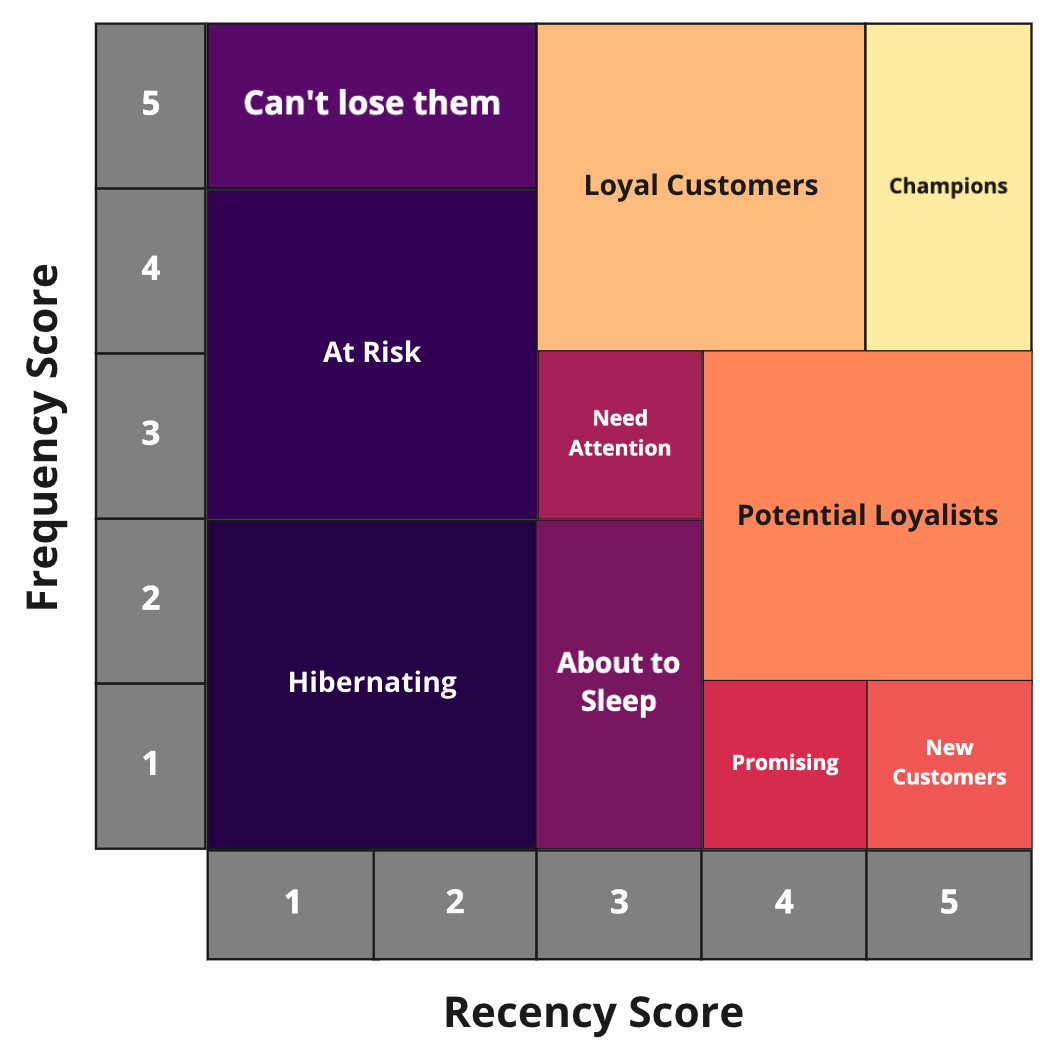

In [159]:
query = """
WITH rfm_base AS (
    -- Calculate basic R, F, M values per customer
    SELECT 
        CustomerID,
        CAST(JULIANDAY('now') - JULIANDAY(MAX(TransactionDate)) AS INTEGER) AS recency,
        COUNT(TransactionID) AS frequency,
        SUM(TransactionAmount_INR) AS monetary
    FROM transactions
    GROUP BY CustomerID
),
rfm_scores AS (
    -- Assign R, F, M scores and concatenate them as RFM
    SELECT 
        CustomerID,
        recency,
        frequency,
        monetary,
        NTILE(5) OVER (ORDER BY recency DESC) AS r_score,
        NTILE(5) OVER (ORDER BY frequency ASC) AS f_score,
        NTILE(5) OVER (ORDER BY monetary ASC) AS m_score,
        CAST(NTILE(5) OVER (ORDER BY recency DESC) AS TEXT) ||
        CAST(NTILE(5) OVER (ORDER BY frequency ASC) AS TEXT) ||
        CAST(NTILE(5) OVER (ORDER BY monetary ASC) AS TEXT) AS rfm
    FROM rfm_base
)
    -- Assign customer segment based on RFM scores
SELECT
    CustomerID,
    recency,
    frequency,
    monetary,
    r_score,
    f_score,
    m_score,
    rfm,
    CASE
        WHEN r_score > 4 AND f_score >= 4 THEN 'Champions'
        WHEN r_score >= 4 AND (f_score BETWEEN 2 AND 3) THEN 'Potential Loyalists'
        WHEN r_score > 4 AND f_score = 1 THEN 'New Customers'
        WHEN (r_score BETWEEN 3 AND 4) AND f_score >= 4 THEN 'Loyal Customers'
        WHEN r_score = 3 AND f_score = 3 THEN 'Need Attention'
        WHEN r_score = 4 AND f_score = 1 THEN 'Promising'
        WHEN r_score <= 2 AND (f_score BETWEEN 3 AND 4) THEN 'At Risk'
        WHEN r_score = 3 AND f_score <= 2 THEN 'About To Sleep'
        WHEN r_score <= 2 AND f_score = 5 THEN 'Cannot Lose Them'
        WHEN r_score <= 2 AND f_score <= 2 THEN 'Hibernating'
    END AS segment
FROM rfm_scores
ORDER BY monetary DESC;
"""
rfm_df = pd.read_sql(query, conn)
rfm_df

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,rfm,segment
0,C7319271,3344,1,"1,560,034.99",2,5,5,255,Cannot Lose Them
1,C6677159,3340,1,"1,380,002.88",3,5,5,355,Loyal Customers
2,C4141768,3339,1,"991,132.22",3,5,5,355,Loyal Customers
3,C8217728,3327,2,"724,472.00",4,5,5,455,Loyal Customers
4,C1830891,3359,1,"720,001.16",1,5,5,155,Cannot Lose Them
...,...,...,...,...,...,...,...,...,...
840645,C5533472,3304,1,0.00,5,1,1,511,New Customers
840646,C4397046,3280,1,0.00,5,1,1,511,New Customers
840647,C6117158,3280,1,0.00,5,1,1,511,New Customers
840648,C7930692,3280,1,0.00,5,1,1,511,New Customers


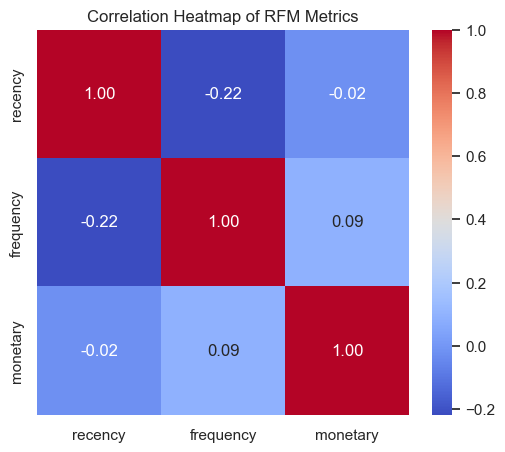

In [170]:
# Plot correlation heatmap for exploratory analysis of RFM variables
plt.figure(figsize=(6,5))
sns.heatmap(rfm_df[['recency','frequency','monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of RFM Metrics')
plt.show()

#### Result interpretations:
Correlation analysis was conducted to examine the relationships among Recency, Frequency, and Monetary metrics before segmentation. The results show weak to moderate relationships — Frequency and Recency (-0.22), Monetary and Recency (-0.02), and Monetary and Frequency (0.09). The negative correlation between Recency and Frequency indicates that customers who purchase more frequently tend to have shorter time gaps since their last transaction, which aligns with expected behavioral patterns. The near-zero correlation between Monetary and Recency suggests that recent purchases do not necessarily correspond to higher spending, reflecting diverse customer value levels. Similarly, the weak positive link between Frequency and Monetary implies that while frequent buyers often spend slightly more, spending levels vary across segments. Overall, the low correlations confirm that each RFM dimension captures distinct aspects of customer engagement, justifying the multidimensional segmentation approach.

In [160]:
segment_counts = rfm_df['segment'].value_counts()
segment_counts

segment
At Risk                151879
Hibernating            145895
Loyal Customers        140594
Potential Loyalists    120433
Champions               81678
About To Sleep          70899
Cannot Lose Them        38486
Promising               31954
Need Attention          31606
New Customers           27226
Name: count, dtype: int64

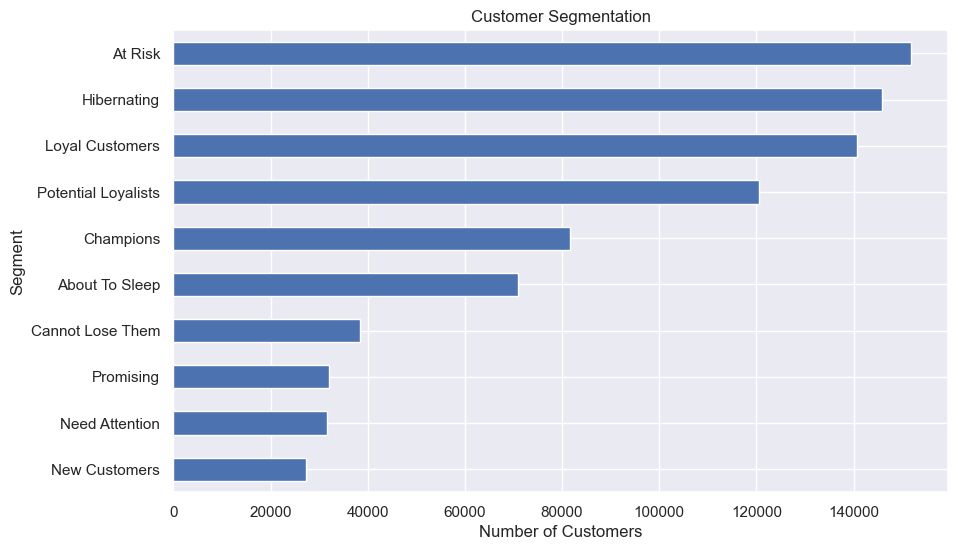

In [161]:
# Horizontal bar chart for customer segmentation distribution
segment_counts = rfm_df['segment'].value_counts()

plt.figure(figsize=(10, 6))  
segment_counts.sort_values().plot(kind='barh')  
plt.title('Customer Segmentation')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
sns.set_theme(style='darkgrid')
plt.show()

#### Result interpretation
The RFM analysis highlights clear differences in customer engagement and value distribution.
The largest segments — At Risk (18.1%) and Hibernating (17.4%) — indicate that over one-third of customers show declining or inactive behavior, representing a major retention risk and untapped revenue potential.

Meanwhile, Loyal Customers (16.7%) and Potential Loyalists (14.3%) form the core active customer base, driving repeat transactions and contributing steadily to overall revenue. These customers demonstrate consistent frequency and spending behavior, making them ideal for cross-selling and upselling opportunities.

Champions (9.7%) are the top-performing group, showing high recency, frequency, and spending — the most profitable segment that should be protected through loyalty rewards and exclusivity programs.

Lower engagement groups such as About To Sleep (8.4%), Cannot Lose Them (4.6%), and Need Attention (3.8%) once showed strong activity but have recently slowed. They are valuable reactivation targets with higher ROI potential than new acquisitions.

Finally, New Customers (3.2%) and Promising (3.8%) customers represent the early-growth pipeline, where effective onboarding and personalized engagement can strengthen loyalty and long-term value.

Overall, this segmentation reveals a two-tier strategy:
1. Retention and recovery: Focus on reactivating dormant and at-risk customers to reduce churn and reclaim lost revenue.
2. Loyalty and growth: Deepen relationships with high-value and emerging customers to maximize lifetime value and build sustainable profitability.

**Recommendations**:
1. Retention and recovery
- Reactivation Focus: Target At Risk and Hibernating customers with personalized re-engagement offers (cashback, reminders, or limited-time rewards) to recover inactive users. They are the largest segment but with low recency, conducting feedback outreach to identify reasons for disengagement (such as competing offers or poor experiences), helping the bank address weaknesses and refine products based on real customer insights.

- Prevent Churn: About To Sleep and Cannot Lose Them customers require proactive monitoring. These users show declining activity despite past value—particularly Cannot Lose Them, who represent a critical loss risk. Implement VIP reactivation programs, exclusive promotions, and personalized communication to re-ignite interest. Collect feedback to uncover underlying dissatisfaction and use these insights to refine customer experience and retention strategy.

2. Loyalty and growth
- Reward Top Performers: Maintain Champions and Loyal Customers are the most valuable, generating a disproportionate share of revenue. Maintain their loyalty through exclusive privileges, premium experiences, and early access to new services. Strengthening emotional connection and recognition in this group protects long-term profitability and promotes strong brand advocacy.
  
- Nurture Growth Segments: Potential Loyalists, Promising, and New Customers show growing engagement and are key to future revenue expansion. Offer onboarding support, progressive incentives, and targeted education on product benefits to deepen relationships. Raising their transaction frequency and monetary value through discounts, gifts, or free trials can accelerate their transition into high-value loyal users.

### 4.4 Location-based Insights

**Objective**:
Analyze transaction activity across top locations to identify high-value regions and understand regional customer behavior.

**Questions in mind**:
- Which cities contribute the most to total transaction volume?
- How does average transaction value differ across locations?

**Business insight**:
Identifying high-value locations allows the bank to prioritize regional marketing campaigns, resource allocation, and tailored product offerings. For example, cities with high total transaction amounts may benefit from premium services, while regions with high average transaction value but lower count may indicate affluent customers for targeted campaigns.

In [162]:
# Transaction count and average amount per location
query = """
SELECT 
    CustLocation, 
    AVG(TransactionAmount_INR) as AvgTransactionAmount,
    SUM(TransactionAmount_INR) as TotalTransactionAmount,
    COUNT(TransactionID) AS TransactionCount
FROM transactions
GROUP BY CustLocation
ORDER BY TotalTransactionAmount DESC
LIMIT 10
"""
location_summary = pd.read_sql_query(query, conn)
location_summary

,CustLocation,AvgTransactionAmount,TotalTransactionAmount,TransactionCount
0,Mumbai,"1,654.72","162,042,202.80",97927
1,New Delhi,"1,709.24","130,852,263.30",76556
2,Bangalore,"1,356.34","105,571,038.19",77835
3,Gurgaon,"1,434.24","101,243,039.64",70590
4,Delhi,"1,384.21","93,467,259.02",67524
5,Noida,"1,322.19","41,983,575.54",31753
6,Kolkata,"2,138.37","40,750,907.86",19057
7,Chennai,"1,389.62","38,317,315.92",27574
8,Pune,"1,436.52","35,295,347.29",24570
9,Hyderabad,"1,413.56","30,886,202.27",21850


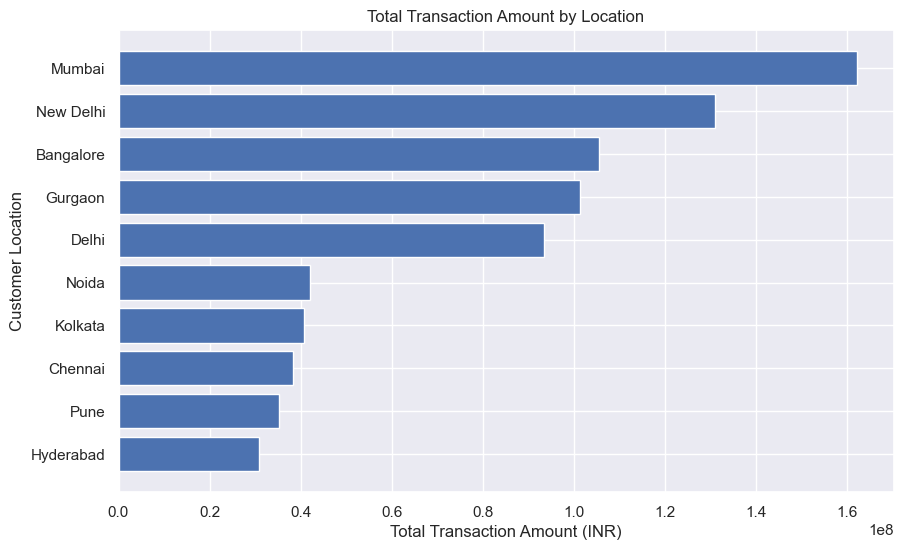

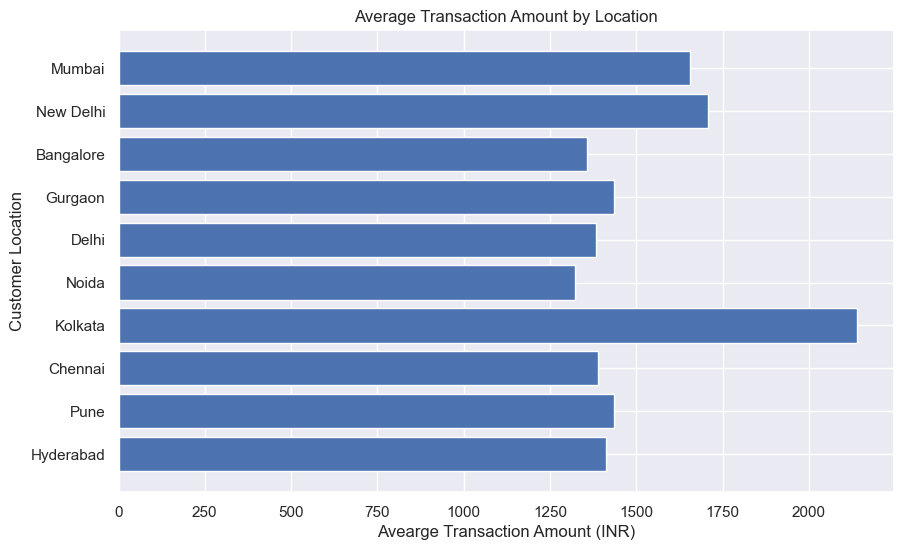

In [163]:
# Horizontal bar chart for total transaction amount by location
plt.figure(figsize=(10, 6))
plt.barh(location_summary['CustLocation'], location_summary['TotalTransactionAmount'])
plt.title('Total Transaction Amount by Location')
plt.xlabel('Total Transaction Amount (INR)')
plt.ylabel('Customer Location')
plt.gca().invert_yaxis() 
sns.set_theme(style='darkgrid')
plt.show()

# Horizontal bar chart for average transaction amount by location
plt.figure(figsize=(10, 6))
plt.barh(location_summary['CustLocation'], location_summary['AvgTransactionAmount'])
plt.title('Average Transaction Amount by Location')
plt.xlabel('Avearge Transaction Amount (INR)')
plt.ylabel('Customer Location')
plt.gca().invert_yaxis() 
sns.set_theme(style='darkgrid')
plt.show()

#### Result interpretation
Mumbai leads in total transaction value (21%), reflecting both high customer activity and transaction amounts.
New Delhi (17%) and Bangalore (14%) are also major contributors to total revenue.
Kolkata, despite fewer transactions, shows the highest average transaction amount (14%), suggesting a smaller base of high-value customers.
Other cities like Gurgaon, Delhi, Noida, Chennai, Pune, and Hyderabad have moderate contributions, indicating opportunities for growth through targeted engagement.

Recommendation:
- Focus marketing and loyalty programs on high-transaction cities (Mumbai, New Delhi, Bangalore) to maximize retention.
- Explore premium offerings in cities with high average transaction amounts but lower count (Kolkata, Pune) to attract similar high-value customers.
- Consider regional campaigns in moderate-performing cities to increase transaction frequency and total revenue.

In [180]:
# Export each DataFrame to CSV for data visualization
import os

files_to_export = {
    "transactions.xlsx": df,
    "weekly_trend.xlsx": weekly_trend,
    "top_customers.xlsx": top_customers,
    "age_group_summary.xlsx": age_group,
    "transaction_bins.xlsx": txn_bins,
    "rfm_segments.xlsx": rfm_df,
    "location_summary.xlsx": location_summary
}

for file_name, dataframe in files_to_export.items():
    if os.path.exists(file_name):
        os.remove(file_name)
        print(f"Old file '{file_name}' removed.")
    dataframe.to_excel(file_name, index=False)
    print(f"New file '{file_name}' created.")

Old file 'transactions.xlsx' removed.
New file 'transactions.xlsx' created.
Old file 'weekly_trend.xlsx' removed.
New file 'weekly_trend.xlsx' created.
Old file 'top_customers.xlsx' removed.
New file 'top_customers.xlsx' created.
Old file 'age_group_summary.xlsx' removed.
New file 'age_group_summary.xlsx' created.
Old file 'transaction_bins.xlsx' removed.
New file 'transaction_bins.xlsx' created.
Old file 'rfm_segments.xlsx' removed.
New file 'rfm_segments.xlsx' created.
Old file 'location_summary.xlsx' removed.
New file 'location_summary.xlsx' created.
